In [42]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import math
plt.rcParams["figure.figsize"] = (15,10)

# Problem 0

In [5]:
t = np.linspace(0,np.pi*100,np.int(1e5))
t

array([0.00000000e+00, 3.14162407e-03, 6.28324814e-03, ...,
       3.14152982e+02, 3.14156124e+02, 3.14159265e+02])

In [6]:
N = 10+np.sin(t)
N

array([10.        , 10.00314162, 10.00628321, ...,  9.99371679,
        9.99685838, 10.        ])

In [7]:
bkgd = stats.norm.rvs(size=np.int(1e5))*np.sqrt(N)+N
bkgd

array([12.58289732,  9.60397134, 10.44765895, ...,  4.56563704,
        9.06760403, 10.9162632 ])

We make an attempt to plot bkgd against t.

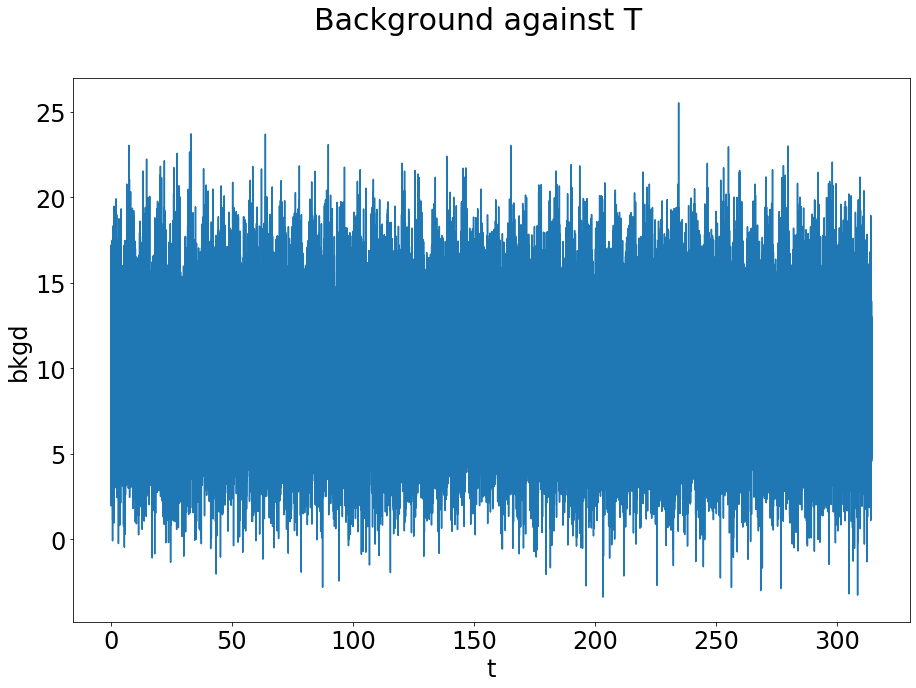

In [43]:
plt.suptitle('Background against T', fontsize=30)
plt.tick_params(labelsize = 24)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.plot(t, bkgd)

# Problem 1

## 1a)

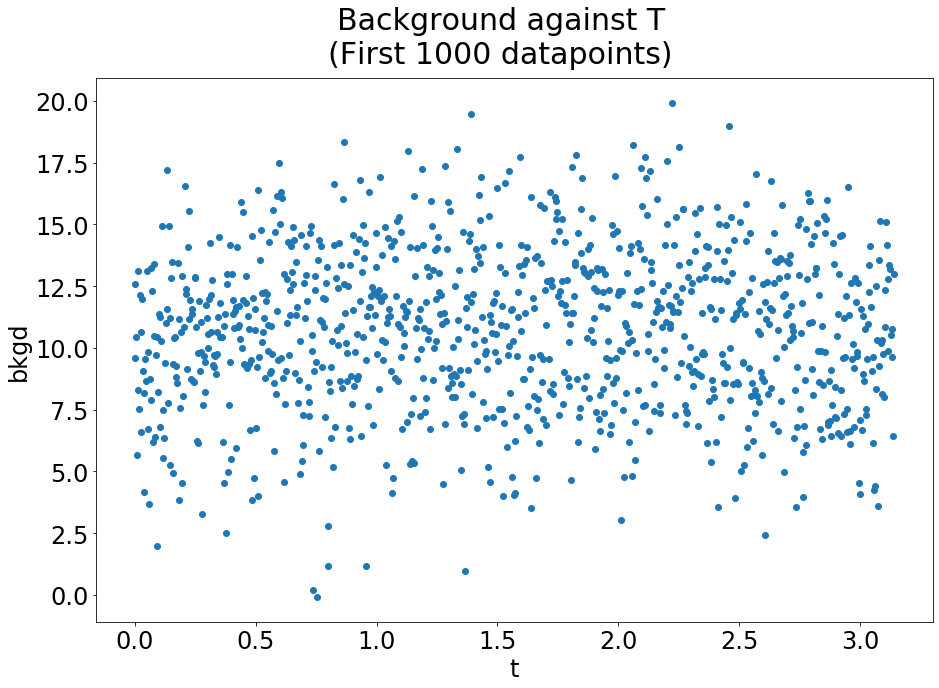

In [44]:
plt.suptitle('Background against T\n(First 1000 datapoints)', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(t[0:1000], bkgd[0:1000])

## 1b)

I shall generalize my code into a function that allows for plotting **x** contiguous points starting at **start**.

In [46]:
def plt_bkgd_contig(x, start):
    plt.suptitle('Background against T\n(' + str(x) + ' datapoints starting at ' + str(start) + ')', fontsize=30)
    plt.xlabel('t', fontsize = 24)
    plt.ylabel('bkgd', fontsize = 24)
    plt.tick_params(labelsize = 24)
    plt.scatter(t[start:start+x], bkgd[start:start+x])

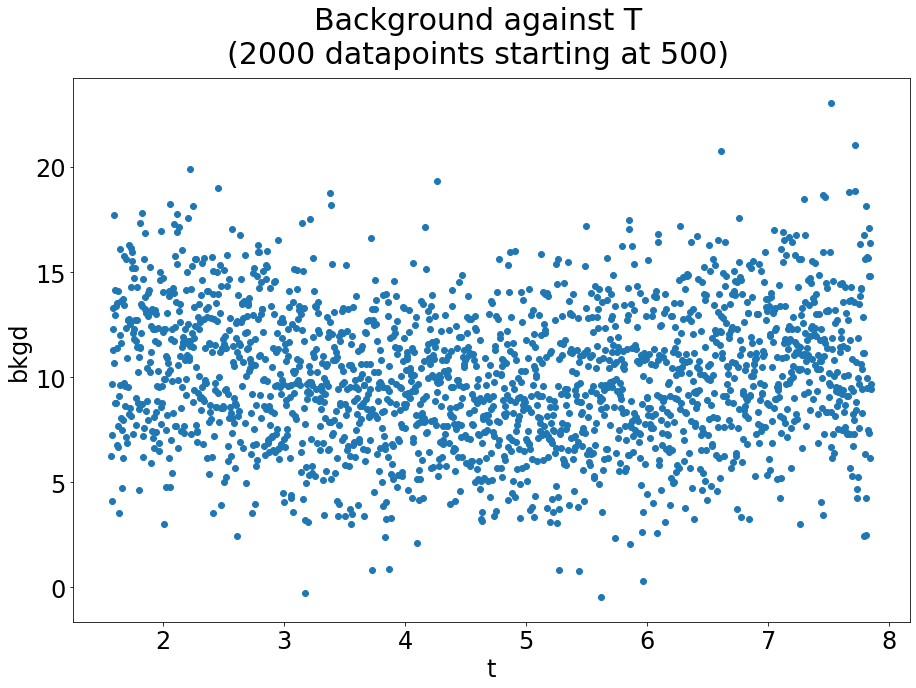

In [47]:
# 2000 points starting at 500
plt_bkgd_contig(2000, 500)

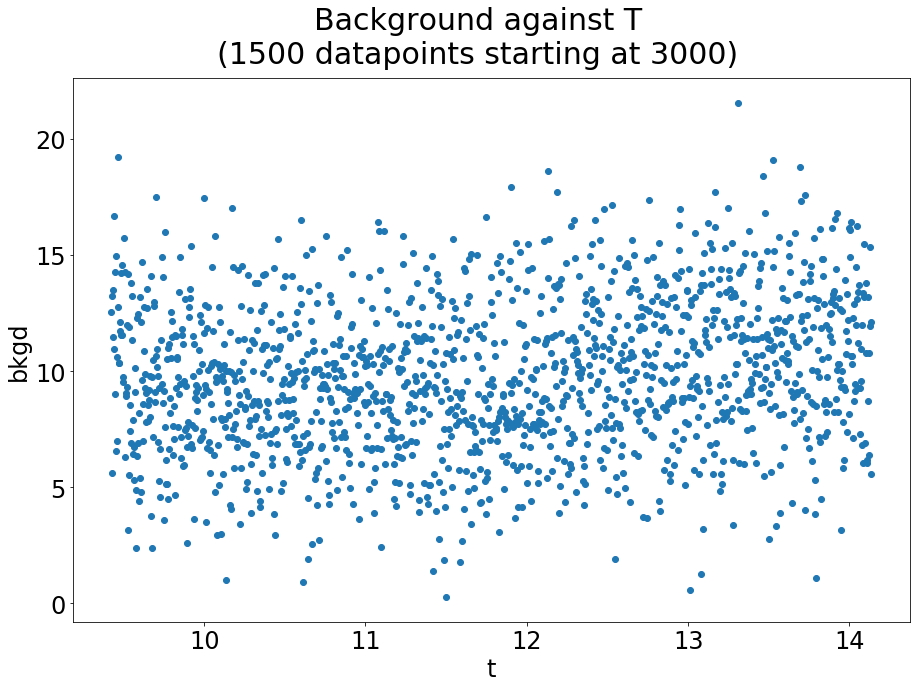

In [48]:
plt_bkgd_contig(1500, 3000)

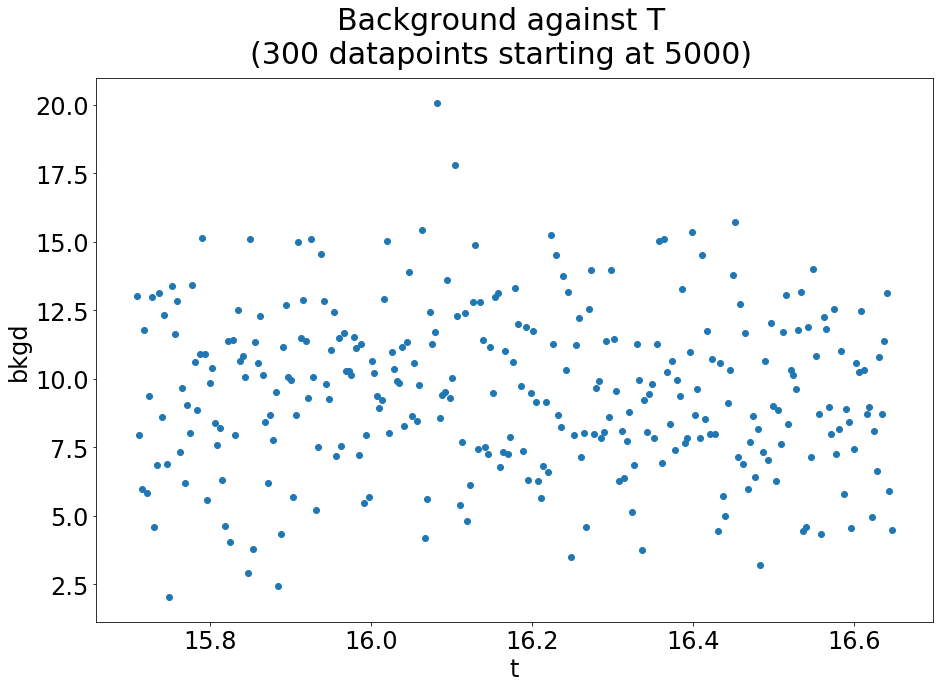

In [49]:
plt_bkgd_contig(300, 5000)

## 1c)

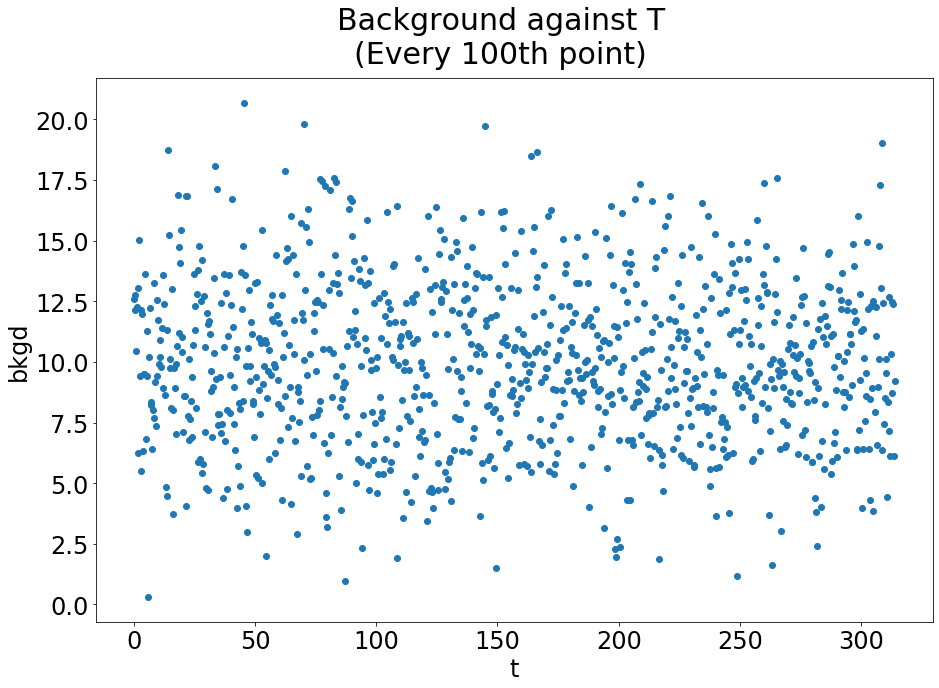

In [51]:
plt.suptitle('Background against T\n(Every 100th point)', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(t[0::100], bkgd[0::100])

# Problem 2

## 2a)

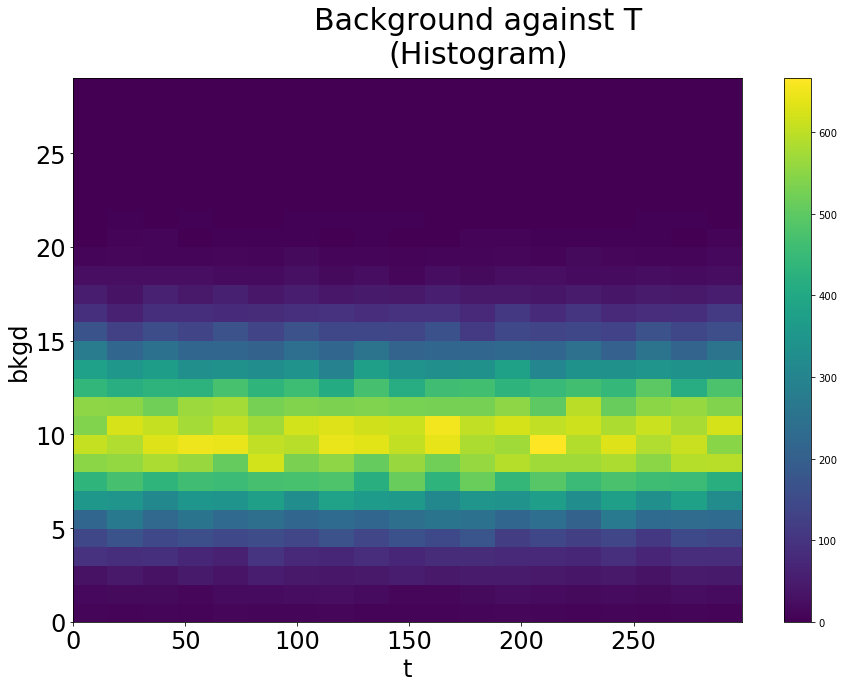

In [54]:
plt.suptitle('Background against T\n(Histogram)', fontsize=30)
plt.xlabel('t', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,100 * math.pi, 5 * math.pi)
biny = np.arange(0,30)
plt.hist2d(t, bkgd, bins = [binx, biny], density = False)
plt.colorbar()

## 2b)
We are plotting the number of datapoints in a certain bin.
<br>For instance, in the rightmost yellow bin, we have over 600 datapoints that fall between the range for $95\pi <= t <= 100\pi$ and $9 <= bkgt <= 10$

## 3

## 3a)

In [16]:
t_2pi = t % (2 * math.pi)
t_2pi

array([0.00000000e+00, 3.14162407e-03, 6.28324814e-03, ...,
       6.27690206e+00, 6.28004368e+00, 1.42108547e-14])

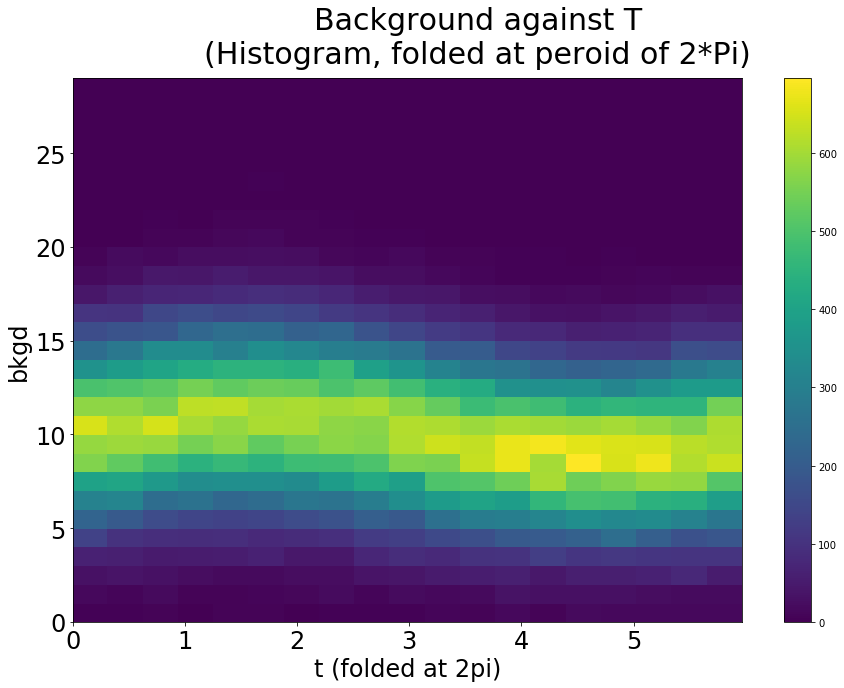

In [55]:
plt.suptitle('Background against T\n(Histogram, folded at peroid of 2*Pi)', fontsize=30)
plt.xlabel('t (folded at 2pi)', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,2 * math.pi, 0.1 * math.pi)
biny = np.arange(0,30)
plt.hist2d(t_2pi, bkgd, bins = [binx, biny], density = False)
plt.colorbar()

## 3c)


In [56]:
#First, we digitize the x-axis
dig_t_folded = np.digitize(t_2pi, binx)
dig_t_folded

array([ 1,  1,  1, ..., 20, 20,  1])

In [57]:
total = np.zeros(len(binx))
count = np.zeros(len(binx))
for i in np.arange(len(bkgd)):
    bin_num = dig_t_folded[i]
    total[bin_num - 1] += bkgd[i]
    count[bin_num - 1] += 1

print(total)
print(count)

[51035.5190102  52169.64086968 53761.09083641 54791.84163599
 54883.39035973 55123.56446451 54482.03684204 53608.27989368
 52012.97109198 50936.2051391  48942.06365895 47749.95949709
 46405.00563965 45723.32376048 45033.9131727  45017.57250876
 45494.30765604 46607.98661152 47362.5942074  48922.98129397]
[5001. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 4999.]


In [58]:
average = np.zeros(len(binx))
for i in np.arange(len(binx)):
    average[i] = total[i] / count[i]
average

array([10.20506279, 10.43392817, 10.75221817, 10.95836833, 10.97667807,
       11.02471289, 10.89640737, 10.72165598, 10.40259422, 10.18724103,
        9.78841273,  9.5499919 ,  9.28100113,  9.14466475,  9.00678263,
        9.0035145 ,  9.09886153,  9.32159732,  9.47251884,  9.78655357])

In [59]:
mid_point = binx + (0.05 * math.pi)
mid_point

array([0.15707963, 0.4712389 , 0.78539816, 1.09955743, 1.41371669,
       1.72787596, 2.04203522, 2.35619449, 2.67035376, 2.98451302,
       3.29867229, 3.61283155, 3.92699082, 4.24115008, 4.55530935,
       4.86946861, 5.18362788, 5.49778714, 5.81194641, 6.12610567])

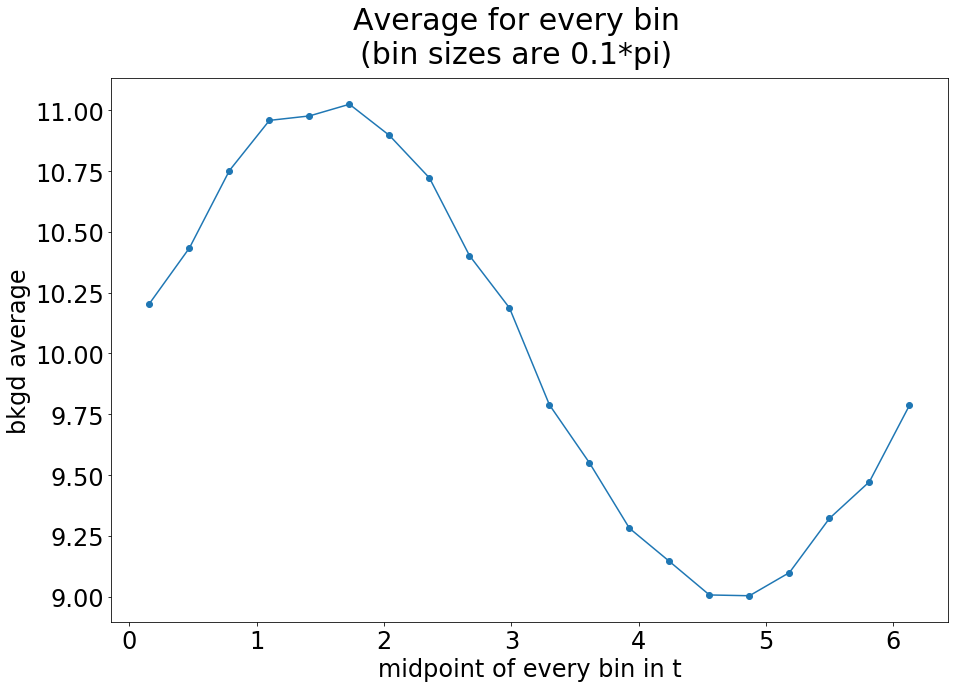

In [60]:
plt.suptitle('Average for every bin\n(bin sizes are 0.1*pi)', fontsize=30)
plt.xlabel('midpoint of every bin in t', fontsize = 24)
plt.ylabel('bkgd average', fontsize = 24)
plt.tick_params(labelsize = 24)
plt.scatter(mid_point, average)
plt.plot(mid_point, average)

## Here are the two plots in the same figure:

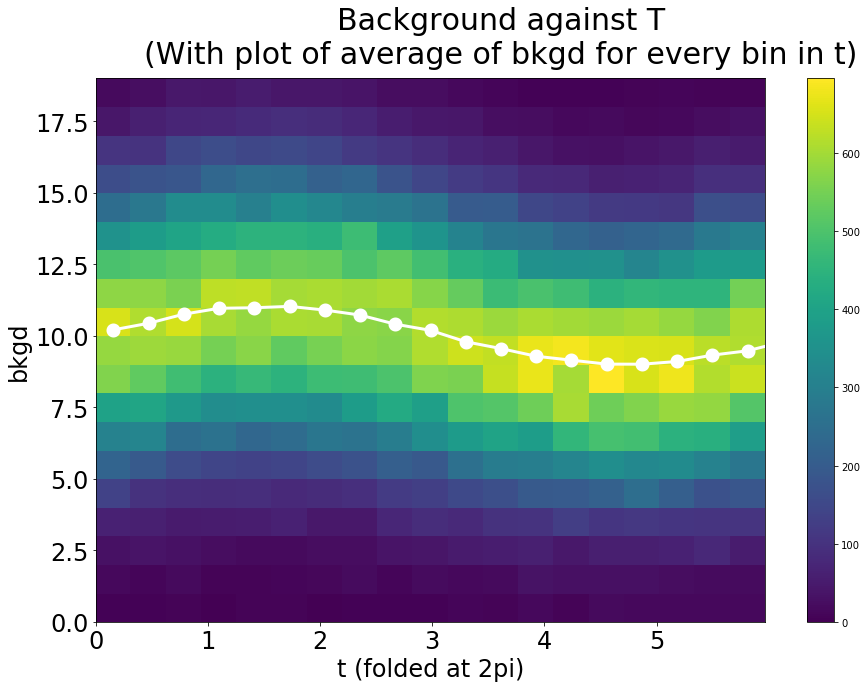

In [75]:
plt.suptitle('Background against T\n(With plot of average of bkgd for every bin in t)', fontsize=30)
plt.xlabel('t (folded at 2pi)', fontsize = 24)
plt.ylabel('bkgd', fontsize = 24)
plt.tick_params(labelsize = 24)
binx = np.arange(0,2 * math.pi, 0.1 * math.pi)
biny = np.arange(0,20)
plt.hist2d(t_2pi, bkgd, bins = [binx, biny], density = False)
plt.colorbar()
plt.scatter(mid_point, average, color = 'white' , marker = 'o', linewidth = 8)
plt.plot(mid_point, average, color = 'white', linewidth = 3)
plt.show()